In [2]:
# Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
%matplotlib inline

In [3]:
#load the csv data
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#display basic stats of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

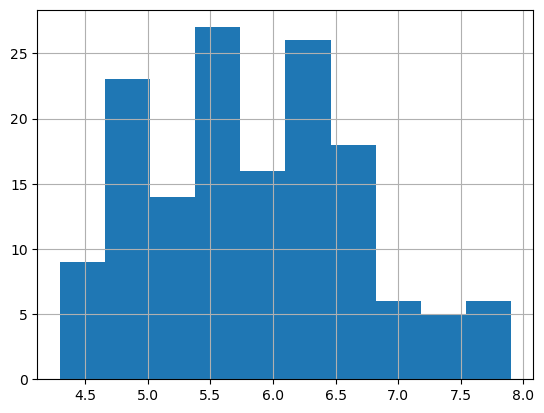

In [7]:
df['sepal_length'].hist()

<Axes: >

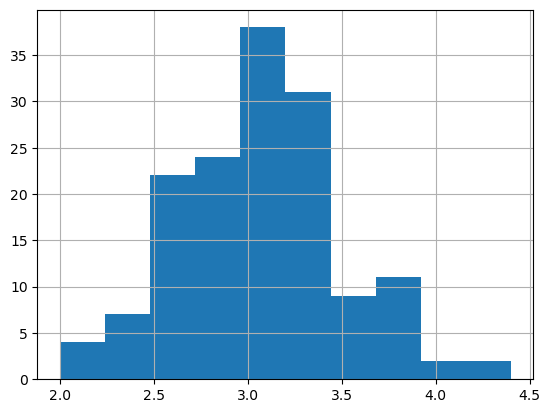

In [8]:
df['sepal_width'].hist()

<Axes: >

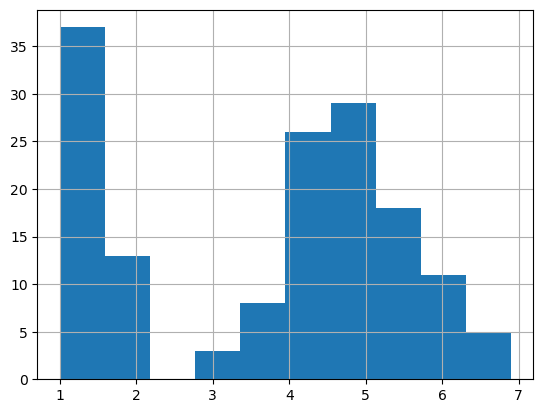

In [9]:
df['petal_length'].hist()

<Axes: >

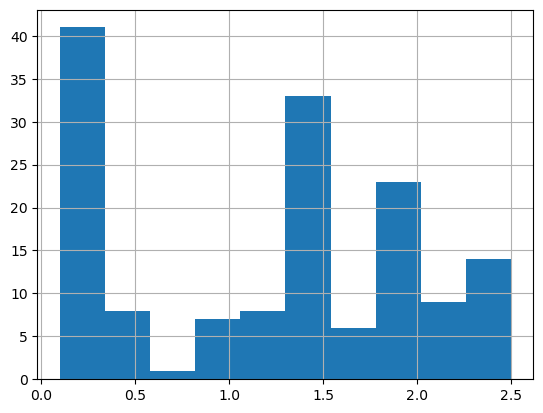

In [10]:
df['petal_width'].hist()

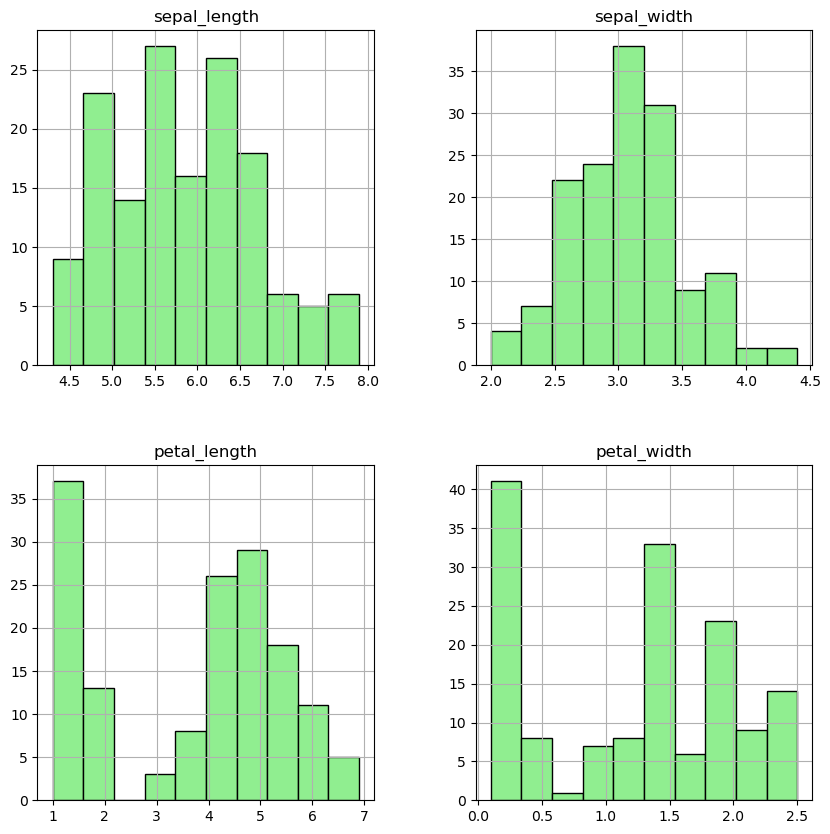

In [37]:
df.hist(color= 'lightgreen' ,edgecolor='black',figsize=(10,10))
plt.show()

In [11]:
# create a list of colors and class labels
colors = ['red', 'orange', 'blue']
species = ['virginica', 'versicolor', 'setosa']

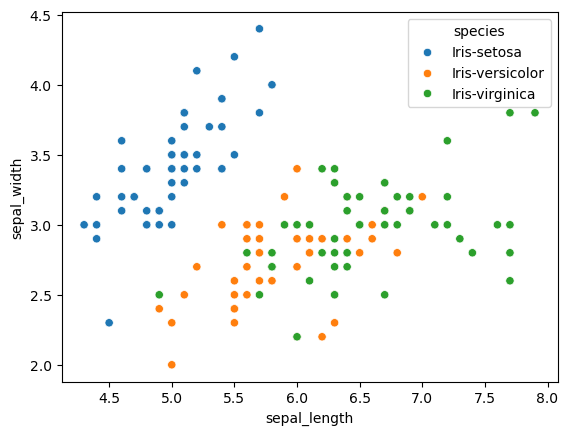

In [12]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

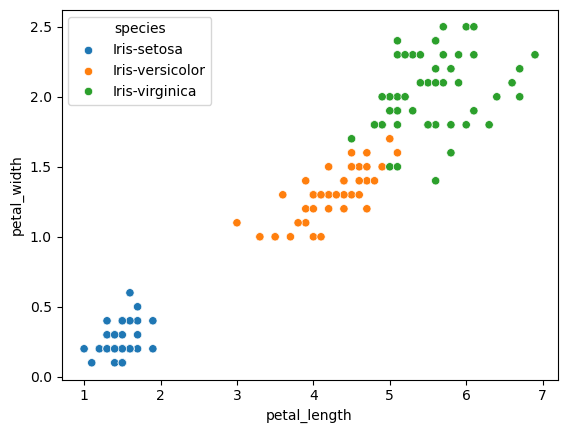

In [13]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.show()

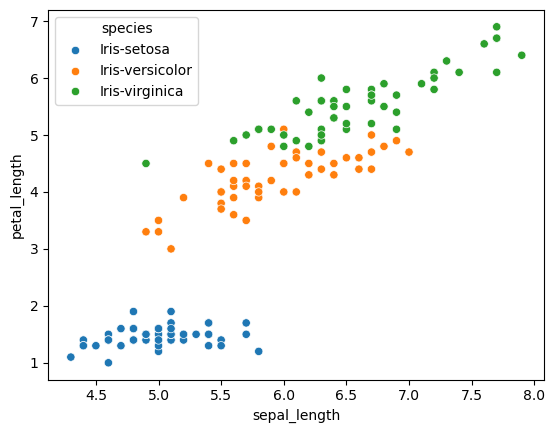

In [14]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df)
plt.show()

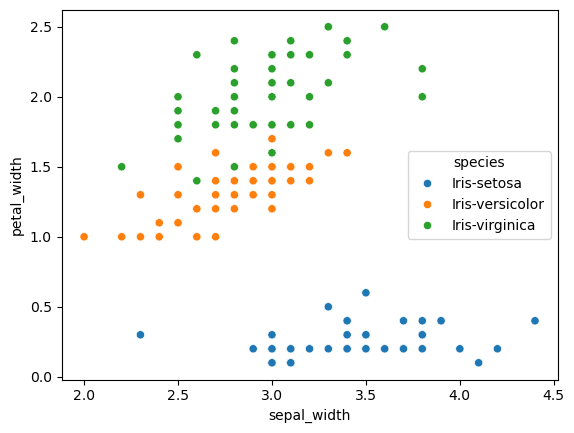

In [15]:
sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data=df)
plt.show()

In [16]:
df['sepal_length'] = pd.to_numeric(df['sepal_length'], errors='coerce')
df['sepal_width'] = pd.to_numeric(df['sepal_width'], errors='coerce')
df['petal_length'] = pd.to_numeric(df['petal_length'], errors='coerce')
df['petal_width'] = pd.to_numeric(df['petal_width'], errors='coerce')

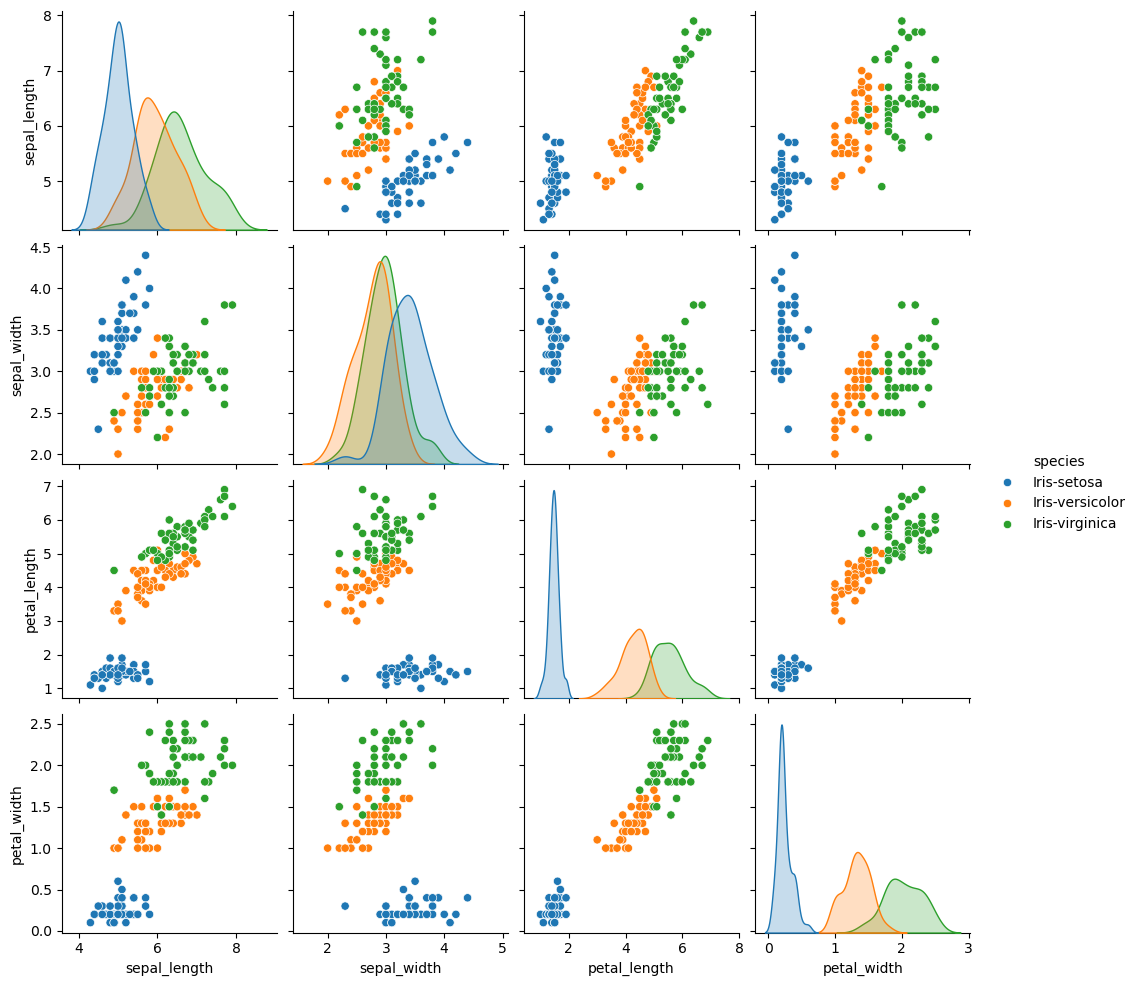

In [17]:
sns.pairplot(df, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

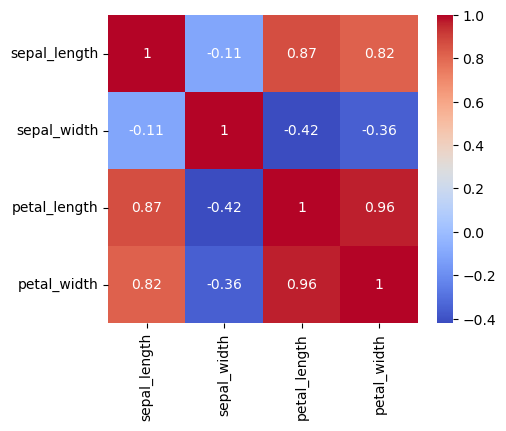

In [19]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

# plot the heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [20]:
# from sklearn.preprocessing import labelEncoder
#le = LabelEncoder()
# transform the string labels to integer
#df['species'] = le.fit_transform(df['species'])
#df.head()

In [21]:
# Model Training and Testing

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data
X = df.drop(columns=['species'])

#output data
Y = df['species']

# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [22]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test) * 100)

Logistic Regression Accuracy:  100.0


In [23]:
# model training
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [24]:
#print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [25]:
# K-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ",model.score(x_test, y_test) * 100)

K-nearest neighbors Accuracy:  100.0


In [26]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [27]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ",model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  100.0


In [28]:
#print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [29]:
# save the model
import pickle
filename = "iris_model.sav"
pickle.dump(model, open(filename, 'wb'))

In [30]:
import pickle

#save the updated model
filename = "iris_model.sav"
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.


In [31]:
load_model = pickle.load(open(filename, 'rb'))

In [32]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)

In [33]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
126,6.2,2.8,4.8,1.8
46,5.1,3.8,1.6,0.2
145,6.7,3.0,5.2,2.3
71,6.1,2.8,4.0,1.3
113,5.7,2.5,5.0,2.0


In [34]:
load_model.predict([[4,3,1,5]])

array(['Iris-versicolor'], dtype=object)